## Assignment_7(B) : Crime_Data

## Import libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# lib for Hierarchical clustering 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# lib for DBSCAN clustering 
from sklearn.cluster import DBSCAN

# lib for KMean clustering 
from sklearn.cluster import KMeans

## Import Dataset

In [83]:
df = pd.read_csv("crime_data.csv")

In [84]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [86]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [87]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


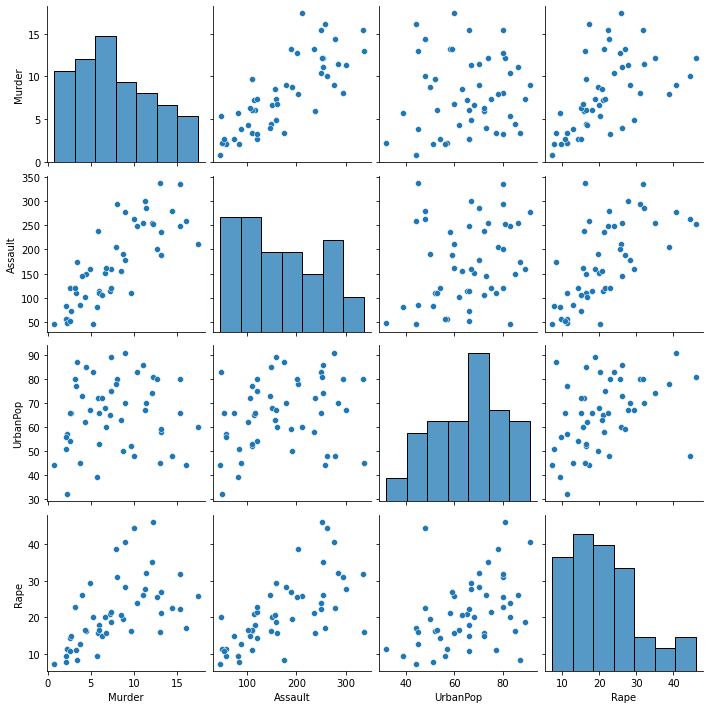

In [88]:
sns.pairplot(df)

In [89]:
df = df.drop(["Unnamed: 0"], axis = 1)
df0= df
df9 = df0
df10 = df0

In [90]:
sc = StandardScaler()
df1 = sc.fit_transform(df)
df1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [91]:
df2 = df1

{'whiskers': [<matplotlib.lines.Line2D at 0x134ddf9c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x134ddf9cc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x134ddf9c160>,
 'medians': [<matplotlib.lines.Line2D at 0x134ddfa4370>,
 'fliers': [<matplotlib.lines.Line2D at 0x134ddfa4700>,
 'means': []}

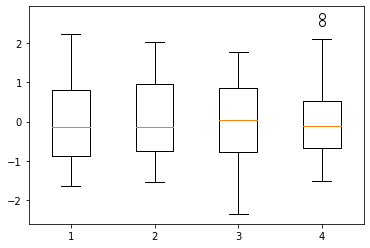

In [92]:
plt.boxplot(df1)

## Hierarchal Clustering

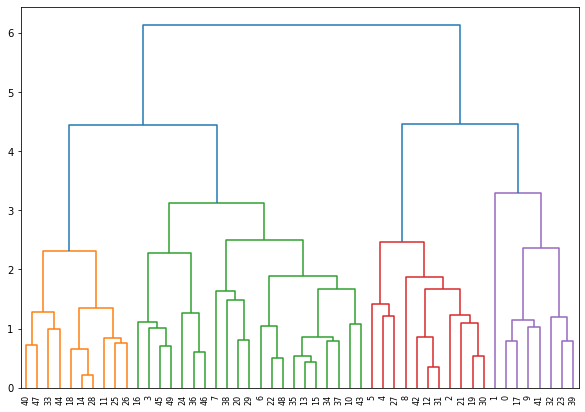

In [93]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(df1,'complete'))

In [94]:
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=4)

In [95]:
y=pd.DataFrame(hclusters.fit_predict(df1),columns=['clustersid'])
y['clustersid'].value_counts()

0    19
1    12
2    12
3     7
Name: clustersid, dtype: int64

In [96]:
df['clustersid']=hclusters.labels_
df

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [97]:
df.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.210526,142.052632,71.263158,19.184211
1,1,10.966667,264.000000,76.500000,33.608333
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


Text(0.5, 1.0, 'Rape')

<Figure size 720x720 with 0 Axes>

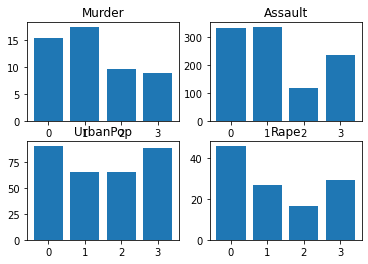

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
fig,a =  plt.subplots(2,2)

a[0][0].bar(df['Cluster'],df['Murder']) 
a[0][0].set_title('Murder')
a[0][1].bar(df['Cluster'],df['Assault']) 
a[0][1].set_title('Assault')
a[1][0].bar(df['Cluster'],df['UrbanPop']) 
a[1][0].set_title('UrbanPop')
a[1][1].bar(df['Cluster'],df['Rape']) 
a[1][1].set_title('Rape')

## K- Mean Clustering

In [128]:
wcss = []
for i in range(1,11):
    model= KMeans(n_clusters=i,random_state = 2)
    model.fit(df1)
    a = model.inertia_
    wcss.append(a)
    

wcss;

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

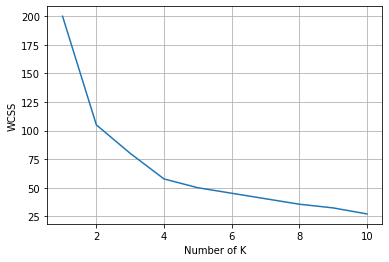

In [100]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number of K")
plt.ylabel("WCSS")
plt.grid()

In [101]:
kmodel= KMeans(n_clusters=4) # by the Elbow method we select n-cluster as 5

In [102]:
y = kmodel.fit_predict(df2)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [103]:
y

array([1, 0, 0, 1, 0, 0, 3, 3, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 2, 0, 3, 0,
       2, 1, 3, 2, 2, 0, 2, 3, 0, 0, 1, 2, 3, 3, 3, 3, 3, 1, 2, 1, 0, 3,
       2, 3, 3, 2, 2, 3])

In [104]:
df0["Cluster"]= y

In [105]:
df0

,Murder,Assault,UrbanPop,Rape,clustersid,Cluster
0,13.2,236,58,21.2,3,1
1,10.0,263,48,44.5,1,0
2,8.1,294,80,31.0,1,0
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,1,0
5,7.9,204,78,38.7,1,0
6,3.3,110,77,11.1,0,3
7,5.9,238,72,15.8,0,3
8,15.4,335,80,31.9,1,0
9,17.4,211,60,25.8,3,1


In [106]:
df0.groupby('Cluster').agg(['mean']).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,0,10.966667,264.000000,76.500000,33.608333,1.000000
1,1,13.937500,243.625000,53.750000,21.412500,2.625000
2,2,3.600000,78.538462,52.076923,12.176923,1.846154
3,3,5.852941,141.176471,73.647059,19.335294,0.000000


Text(0.5, 1.0, 'Rape')

<Figure size 720x720 with 0 Axes>

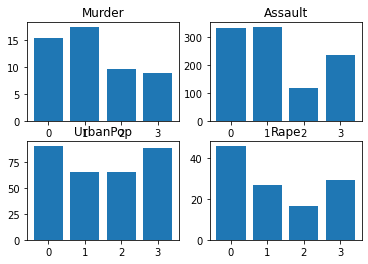

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
fig,a =  plt.subplots(2,2)

a[0][0].bar(df0['Cluster'],df0['Murder']) 
a[0][0].set_title('Murder')
a[0][1].bar(df0['Cluster'],df0['Assault']) 
a[0][1].set_title('Assault')
a[1][0].bar(df0['Cluster'],df0['UrbanPop']) 
a[1][0].set_title('UrbanPop')
a[1][1].bar(df0['Cluster'],df0['Rape']) 
a[1][1].set_title('Rape')


## DBSCAN

In [108]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=1,min_samples=6)
dbscan.fit(df1)

DBSCAN(eps=1, min_samples=6)

In [109]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [110]:
clusters=pd.DataFrame(dbscan.labels_,columns=['clusters'])
clusters

,clusters
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1
